In [2]:
import tensorflow as tf 
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import Common_Functions as cf 
from mpl_toolkits import mplot3d
plt.rc('font', family='serif')
import matplotlib
matplotlib.rcParams.update({'legend.fontsize': 16})
matplotlib.rcParams.update({'font.size': 16})

In [4]:
df_pions = np.array(pd.read_csv('/home/sean/Documents/Work/Level 4/Level-4-Masters-Project/testing_data.csv',header = None))

train_x, train_y = cf.data_normaliser(df_pions[:-1000,:-1]), df_pions[:-1000,-1]
val_x, val_y = cf.data_normaliser(df_pions[-1000:,:-1]), df_pions[-1000:,-1]
opt = ['SGD','Adagrad','RMSprop','Adam','NAdam','Adamax',]

In [5]:
def optimiser_test(optimiser_list,repeats):
    no_optimsier = len(optimiser_list)
    is_last_val_bool = np.zeros(no_optimsier)
    min_mape = np.zeros((no_optimsier,repeats))
    for i in range(no_optimsier):
        last_val_bool = 0
        for j in range(repeats):
            df = pd.DataFrame(cf.trained_network(train_x,train_y,val_x,val_y,[512,512], optimizer= optimiser_list[i], verbose= 0,epochs = 100, batch_size= 256, ).history)
            val_mape_ar_smoothed = cf.exponetial_smoothing(np.array(df['val_mean_absolute_percentage_error']),0.4)
            loss_ar_smoothed = cf.exponetial_smoothing(np.array(df['loss']),0.4)
            min_mape[i,j] = np.min(val_mape_ar_smoothed)
            if cf.neg_grad_tester(val_mape_ar_smoothed,loss_ar_smoothed):
                last_val_bool +=1
                print('Negative Grad Identified')
            else:
                pass
        if last_val_bool >= repeats/4:
            is_last_val_bool[i] = 1
        else:
            is_last_val_bool[i] = 0
    return min_mape, is_last_val_bool

In [6]:
min_mape ,bool = optimiser_test(opt,10)



2022-01-12 16:11:25.978402: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-01-12 16:11:26.059005: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-01-12 16:11:26.059459: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-01-12 16:11:26.060230: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags

Negative Grad Identified
Negative Grad Identified
Negative Grad Identified
Negative Grad Identified
Negative Grad Identified
Negative Grad Identified
Negative Grad Identified
Negative Grad Identified
Negative Grad Identified
Negative Grad Identified
Negative Grad Identified
Negative Grad Identified
Negative Grad Identified
Negative Grad Identified
Negative Grad Identified
Negative Grad Identified
Negative Grad Identified
Negative Grad Identified
Negative Grad Identified
Negative Grad Identified
Negative Grad Identified
Negative Grad Identified
Negative Grad Identified


[        nan 92.34131722  5.30239598  3.98219555  4.13522284  4.40013698]
[       nan 0.99368826 0.05185904 0.02756497 0.01455147 0.03748911]


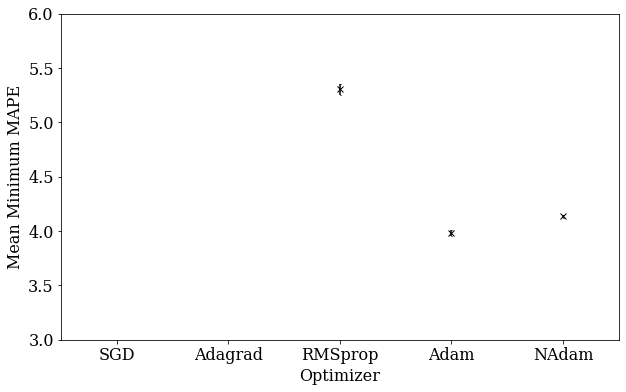

In [21]:
mean_min_mape = np.mean(min_mape,axis = 1)
#print(min_mape[0,:])
ste = np.std(min_mape,axis = 1)/10**0.5
fig = plt.figure( figsize = (10,6))
plt.errorbar(range(5),mean_min_mape[:-1],ste[:-1], linestyle = '' , marker = 'x',capsize= 0.5,c = 'black')
plt.xticks(range(5),opt[:-1])
plt.xlim(-0.5,4.5)
plt.ylim(3,6)
plt.ylabel('Mean Minimum MAPE')
plt.xlabel('Optimizer')
print(mean_min_mape)
print(ste)


In [20]:
np.savetxt('/home/sean/Documents/Work/Level 4/Level-4-Masters-Project/Sean_Working_Notebooks/Testing_Notebooks/optimisers.csv',min_mape)
fig.savefig('/home/sean/Documents/Work/Level 4/Level-4-Masters-Project/Figures/diff_opt.png',dpi = 300)